In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
input_dir = './Output_FE_Assignment_1_Flike/'

print(
    input_dir,
    sep='\n'
    )

./Output_FE_Assignment_1_Flike/


In [3]:
def list_files(arg_directory_path, arg_regex, arg_column_name='file_path'):
    """return list of files in a directory

    arguments:
        [string] --> arg_directory_path = directory path of the polygons
        [string] --> arg_regex = regex entry
        [string] --> arg_column_name = column's name
    """
    list_files = glob.glob(pathname=arg_directory_path + arg_regex)
    list_files = pd.DataFrame(list_files, columns=[arg_column_name])
    list_files.sort_values(by=[arg_column_name], inplace=True)
    list_files.reset_index(drop=True, inplace=True)

    return list_files

In [97]:
results = list_files(input_dir, '*.txt', 'file_name')
results.file_name = results.file_name.str.split(pat='/').str[-1]
results['data_case'] = results.file_name.str.split(pat='__').str[1]
results['prob_fit'] = results.file_name.str.split(pat='__').str[-1].str.split(pat='.').str[0]
results.sort_values(by=['prob_fit', 'data_case'], inplace=True)
results.reset_index(drop=True, inplace=True)
results

,file_name,data_case,prob_fit
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV


In [15]:
asd = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[9]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=128, nrows=12
    )
asd

,ARI,flow_rate,lower_5,upper_95
0,1.01,4.39,1.37,6.22
1,1.10,7.99,6.10,9.48
2,1.25,10.34,8.65,11.96
3,1.50,12.71,10.89,14.57
4,1.75,14.39,12.42,16.49
5,2.00,15.73,13.61,18.05
6,3.00,19.49,16.89,22.67
7,5.00,23.99,20.71,28.63
8,10.00,30.18,25.35,38.45
9,20.00,36.72,29.83,50.66


In [16]:
asd_1 = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[0]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=100, nrows=12
    )
asd_1

,ARI,flow_rate,lower_5,upper_95
0,1.01,1.18,-14.89,5.53
1,1.10,5.45,-2.27,8.97
2,1.25,8.23,3.05,12.10
3,1.50,11.03,6.50,15.69
4,1.75,13.01,8.34,18.31
5,2.00,14.59,9.65,20.53
6,3.00,19.00,13.69,27.31
7,5.00,24.28,17.56,39.60
8,10.00,31.51,22.16,69.44
9,20.00,39.12,26.02,120.31


In [26]:
asd_2 = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[1]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=99, nrows=12
    )
asd_2

,ARI,flow_rate,lower_5,upper_95
0,1.01,11.65,8.06,12.18
1,1.10,12.47,10.46,13.15
2,1.25,13.27,11.77,14.61
3,1.50,14.38,12.61,16.88
4,1.75,15.40,13.18,18.85
5,2.00,16.37,13.71,21.15
6,3.00,20.06,15.57,31.50
7,5.00,27.04,18.56,65.94
8,10.00,43.59,23.56,228.64
9,20.00,75.03,29.72,856.33


In [27]:
asd_3 = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[2]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=99, nrows=12
    )
asd_3

,ARI,flow_rate,lower_5,upper_95
0,1.01,5.45,-26.55,11.49
1,1.10,10.90,0.29,14.04
2,1.25,13.57,8.28,16.56
3,1.50,15.75,12.42,19.01
4,1.75,17.05,13.94,20.30
5,2.00,17.96,14.84,21.13
6,3.00,20.06,17.15,22.98
7,5.00,21.91,19.28,26.99
8,10.00,23.67,21.54,37.18
9,20.00,24.92,22.67,48.86


In [ ]:
def asdasd(
    arg_full_x, arg_full_y, arg_full_y_95, arg_full_y_05,
    arg_c1_x, arg_c1_y, arg_c1_y_95, arg_c1_y_05,
    arg_c2_x, arg_c2_y, arg_c2_y_95, arg_c2_y_05,
    arg_c3_x, arg_c3_y, arg_c3_y_95, arg_c3_y_05,
    ):

    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,16))

    ax[0].plot(
        arg_full_x,
        arg_full_y,
        '-o',
        color='tab:blue',
        linewidth=0.5,
        markersize=2
        )

    ax[0].fill_between(
        x=arg_full_x,
        y1=arg_full_y_95,
        y2=arg_full_y_05,
        color='tab:blue',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_full_x[8:], arg_full_y[8:]):
        ax[0].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_full_x[8:], arg_full_y_95[8:]):
        ax[0].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_full_x[8:], arg_full_y_05[8:]):
        ax[0].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[0].grid(visible=True, which='both')
    ax[0].set_xscale(value='log')
    ax[0].set_title(label='asd', loc='left')

    ###

    ax[1].plot(
        arg_c1_x,
        arg_c1_y,
        '-o',
        color='tab:orange',
        linewidth=0.5,
        markersize=2
        )

    ax[1].fill_between(
        x=arg_c1_x,
        y1=arg_c1_y_95,
        y2=arg_c1_y_05,
        color='tab:orange',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_c1_x[8:], arg_c1_y[8:]):
        ax[1].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c1_x[8:], arg_c1_y_95[8:]):
        ax[1].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c1_x[8:], arg_c1_y_05[8:]):
        ax[1].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[1].grid(visible=True, which='both')
    ax[1].set_xscale(value='log')
    ax[1].set_title(label='asd', loc='left')

    ###

    ax[2].plot(
        arg_c2_x,
        arg_c2_y,
        '-o',
        color='tab:green',
        linewidth=0.5,
        markersize=2
        )

    ax[2].fill_between(
        x=arg_c2_x,
        y1=arg_c2_y_95,
        y2=arg_c2_y_05,
        color='tab:green',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_c2_x[8:], arg_c2_y[8:]):
        ax[2].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c2_x[8:], arg_c2_y_95[8:]):
        ax[2].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c2_x[8:], arg_c2_y_05[8:]):
        ax[2].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[2].grid(visible=True, which='both')
    ax[2].set_xscale(value='log')
    ax[2].set_title(label='asd', loc='left')

    ###

    ax[3].plot(
        arg_c3_x,
        arg_c3_y,
        '-o',
        color='tab:red',
        linewidth=0.5,
        markersize=2
        )

    ax[3].fill_between(
        x=arg_c3_x,
        y1=arg_c3_y_95,
        y2=arg_c3_y_05,
        color='tab:red',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_c3_x[8:], arg_c3_y[8:]):
        ax[3].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c3_x[8:], arg_c3_y_95[8:]):
        ax[3].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c3_x[8:], arg_c3_y_05[8:]):
        ax[3].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[3].grid(visible=True, which='both')
    ax[3].set_xscale(value='log')
    ax[3].set_title(label='asd', loc='left')

    fig.suptitle(t='asdasd', x=0.5, y=0.91)
    fig.supxlabel(t='Annual Recurrence Interval in ($year$)', x=0.5, y=0.08)
    fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.03, y=0.5)

    # fig.savefig(fname='')

Text(0.03, 0.5, 'Flow Rate in ($m^3/s$)')

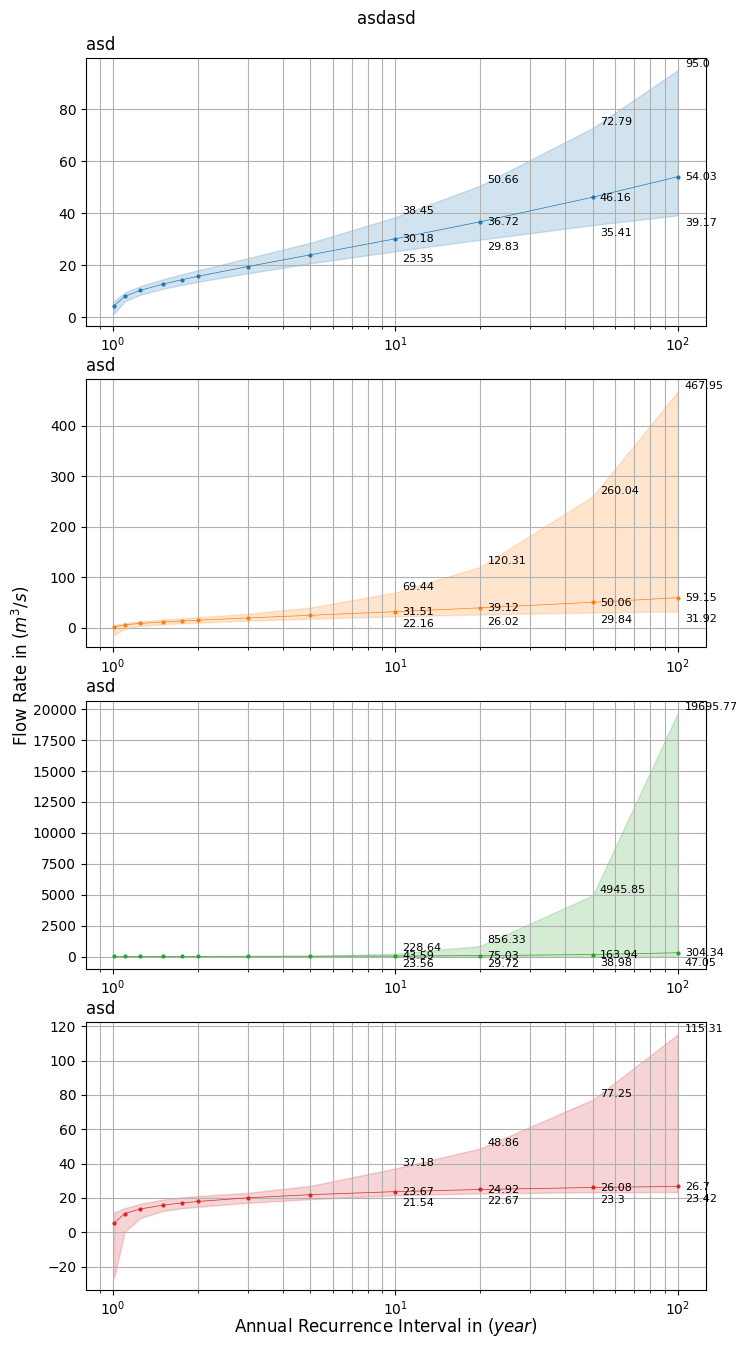

In [96]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,16))

ax[0].plot(
    asd.ARI,
    asd.flow_rate,
    '-o',
    color='tab:blue',
    linewidth=0.5,
    markersize=2
    )

ax[0].fill_between(
    x=asd.ARI,
    y1=asd.upper_95,
    y2=asd.lower_5,
    color='tab:blue',
    alpha=0.2
    )

for ind1, ind2 in zip(asd.ARI[8:], asd.flow_rate[8:]):
    ax[0].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd.ARI[8:], asd.upper_95[8:]):
    ax[0].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd.ARI[8:], asd.lower_5[8:]):
    ax[0].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[0].grid(visible=True, which='both')
ax[0].set_xscale(value='log')
ax[0].set_title(label='asd', loc='left')

###

ax[1].plot(
    asd_1.ARI,
    asd_1.flow_rate,
    '-o',
    color='tab:orange',
    linewidth=0.5,
    markersize=2
    )

ax[1].fill_between(
    x=asd_1.ARI,
    y1=asd_1.upper_95,
    y2=asd_1.lower_5,
    color='tab:orange',
    alpha=0.2
    )

for ind1, ind2 in zip(asd_1.ARI[8:], asd_1.flow_rate[8:]):
    ax[1].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_1.ARI[8:], asd_1.upper_95[8:]):
    ax[1].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_1.ARI[8:], asd_1.lower_5[8:]):
    ax[1].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[1].grid(visible=True, which='both')
ax[1].set_xscale(value='log')
ax[1].set_title(label='asd', loc='left')

###

ax[2].plot(
    asd_2.ARI,
    asd_2.flow_rate,
    '-o',
    color='tab:green',
    linewidth=0.5,
    markersize=2
    )

ax[2].fill_between(
    x=asd_2.ARI,
    y1=asd_2.upper_95,
    y2=asd_2.lower_5,
    color='tab:green',
    alpha=0.2
    )

for ind1, ind2 in zip(asd_2.ARI[8:], asd_2.flow_rate[8:]):
    ax[2].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_2.ARI[8:], asd_2.upper_95[8:]):
    ax[2].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_2.ARI[8:], asd_2.lower_5[8:]):
    ax[2].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[2].grid(visible=True, which='both')
ax[2].set_xscale(value='log')
ax[2].set_title(label='asd', loc='left')

###

ax[3].plot(
    asd_3.ARI,
    asd_3.flow_rate,
    '-o',
    color='tab:red',
    linewidth=0.5,
    markersize=2
    )

ax[3].fill_between(
    x=asd_3.ARI,
    y1=asd_3.upper_95,
    y2=asd_3.lower_5,
    color='tab:red',
    alpha=0.2
    )

for ind1, ind2 in zip(asd_3.ARI[8:], asd_3.flow_rate[8:]):
    ax[3].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_3.ARI[8:], asd_3.upper_95[8:]):
    ax[3].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_3.ARI[8:], asd_3.lower_5[8:]):
    ax[3].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[3].grid(visible=True, which='both')
ax[3].set_xscale(value='log')
ax[3].set_title(label='asd', loc='left')

fig.suptitle(t='asdasd', x=0.5, y=0.91)
fig.supxlabel(t='Annual Recurrence Interval in ($year$)', x=0.5, y=0.08)
fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.03, y=0.5)

# fig.savefig(fname='')